### Homework 2 - Movie Lens Data Analysis

#### Done by Mohanapriya Subramanian

In [42]:
import pandas as pd
mlmdata = pd.read_csv('ml1mdata2000.csv')
# get the date from timestamp:
mlmdata['date']=pd.to_datetime(mlmdata['timestamp'], unit='s', errors='coerce')
#using the DatetimeIndex() function to extract year and month:
mlmdata['year'] = pd.DatetimeIndex(mlmdata['date']).year
mlmdata['month'] = pd.DatetimeIndex(mlmdata['date']).month

<bound method NDFrame.head of          user_id  movie_id  rating  timestamp gender   age  occupation    zip  \
0            1.0    1193.0       5  978300760      F   1.0        10.0  48067   
1            2.0    1193.0       5  978298413      M  56.0        16.0  70072   
2           12.0    1193.0       4  978220179      M  25.0        12.0  32793   
3           15.0    1193.0       4  978199279      M  25.0         7.0  22903   
4           17.0    1193.0       5  978158471      M  50.0         1.0  95350   
...          ...       ...     ...        ...    ...   ...         ...    ...   
1000204   5949.0    2198.0       5  958846401      M  18.0        17.0  47901   
1000205   5675.0    2703.0       3  976029116      M  35.0        14.0  30030   
1000206   5780.0    2845.0       1  958153068      M  18.0        17.0  92886   
1000207   5851.0    3607.0       5  957756608      F  18.0        20.0  55410   
1000208   5938.0    2909.0       4  957273353      M  25.0         1.0  35401  

In [31]:
import numpy as np
mlmdata = mlmdata.replace('?',np.NaN)

print(mlmdata.isna().sum().sum(), "missing values are there in this data set")
print(mlmdata.isna().any(axis=1).sum(), "rows with missing values")         

553 missing values are there in this data set
414 rows with missing values


In [32]:
print(mlmdata.isna().sum())
missingData = mlmdata.isna().sum()
print("Attribute" ,missingData.idxmax(),"has the most missing values with",missingData.max(), "values missing")


user_id        13
movie_id       80
rating          0
timestamp       0
gender          0
age            66
occupation     55
zip            73
title         173
genres         93
date            0
year            0
month           0
dtype: int64
Attribute title has the most missing values with 173 values missing


In [64]:
mlmdata1 = mlmdata.dropna()
print("Number of Rows before dropping missing values", mlmdata.shape[0]) 
print("Rows after dropping missing values", mlmdata1.shape[0])

Number of Rows before dropping missing values 1000209
Rows after dropping missing values 999795


In [34]:
print("Summary Statistics for Age attribute:\n",mlmdata1.age.describe())

Summary Statistics for Age attribute:
 count    999795.000000
mean         29.738092
std          11.751970
min           1.000000
25%          25.000000
50%          25.000000
75%          35.000000
max          56.000000
Name: age, dtype: float64


In [48]:
mlmdata1.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)  #factorize the categorical values for corr

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,date,year,month
user_id,1.000000,-0.053931,-0.032510,-0.056040,0.002819,-0.033288,-0.000359,0.664927,-0.053931,0.029254,-0.056040,-0.122047,0.073399
movie_id,-0.053931,1.000000,0.200741,0.528381,-0.000694,0.011048,0.001020,-0.027583,1.000000,0.151493,0.528381,0.045383,0.000735
rating,-0.032510,0.200741,1.000000,0.193124,0.019847,-0.010209,-0.000392,-0.021689,0.200741,0.083203,0.193124,0.024483,-0.006270
timestamp,-0.056040,0.528381,0.193124,1.000000,-0.011547,-0.006123,-0.007766,-0.030622,0.528381,0.143699,1.000000,0.121314,-0.018051
gender,0.002819,-0.000694,0.019847,-0.011547,1.000000,-0.017903,-0.004117,0.025886,-0.000694,0.050605,-0.011547,-0.026709,-0.032158
age,-0.033288,0.011048,-0.010209,-0.006123,-0.017903,1.000000,0.048601,-0.017679,0.011048,0.008825,-0.006123,-0.030438,-0.010807
occupation,-0.000359,0.001020,-0.000392,-0.007766,-0.004117,0.048601,1.000000,-0.006052,0.001020,-0.001472,-0.007766,-0.009217,-0.003142
zip,0.664927,-0.027583,-0.021689,-0.030622,0.025886,-0.017679,-0.006052,1.000000,-0.027583,0.031477,-0.030622,-0.096665,0.085088
title,-0.053931,1.000000,0.200741,0.528381,-0.000694,0.011048,0.001020,-0.027583,1.000000,0.151493,0.528381,0.045383,0.000735
genres,0.029254,0.151493,0.083203,0.143699,0.050605,0.008825,-0.001472,0.031477,0.151493,1.000000,0.143699,-0.019709,0.007076


In [68]:
mlmdata1.corr()

C:\Users\mohan\AppData\Local\Temp\ipykernel_824\1337178860.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mlmdata1.corr()


,user_id,movie_id,rating,timestamp,age,occupation,year,month
user_id,1.000000,-0.017614,0.012384,-0.490446,0.034718,-0.026696,-0.094316,-0.633603
movie_id,-0.017614,1.000000,-0.064094,0.041597,0.027591,0.008543,0.039231,-0.003239
rating,0.012384,-0.064094,1.000000,-0.026750,0.056876,0.006733,-0.024483,0.000943
timestamp,-0.490446,0.041597,-0.026750,1.000000,-0.064597,0.015637,0.840574,0.121068
age,0.034718,0.027591,0.056876,-0.064597,1.000000,0.078362,-0.065603,0.016184
occupation,-0.026696,0.008543,0.006733,0.015637,0.078362,1.000000,-0.003114,0.035156
year,-0.094316,0.039231,-0.024483,0.840574,-0.065603,-0.003114,1.000000,-0.432900
month,-0.633603,-0.003239,0.000943,0.121068,0.016184,0.035156,-0.432900,1.000000


The most significant correlation, apart from correlations within the same attribute,is oberved between Rating and Age and is also observed between 'Movie ID' and 'Date,' as movies are typically released within specific time periods. Following that, we find a notable correlation between 'Movies' and 'Ratings,' which reflects the relationship between individual movies and their respective ratings

<Axes: >

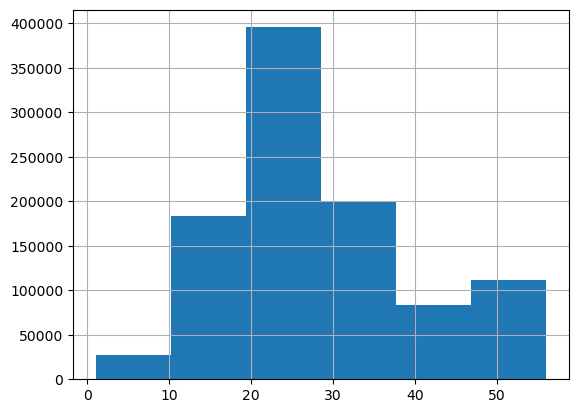

In [58]:
%matplotlib inline

mlmdata1['age'].hist(bins=6)

The distribution looks more like a normal distribution when distributed using 6 bins

<Axes: >

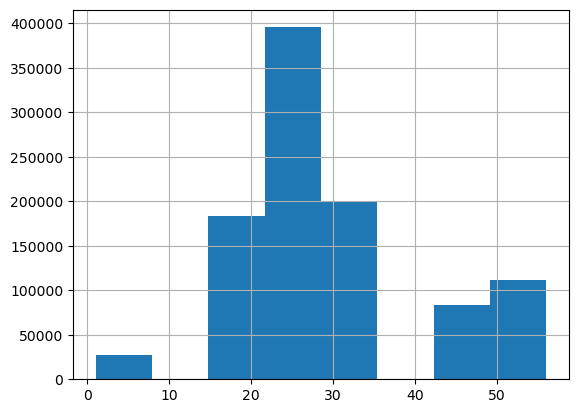

In [62]:
%matplotlib inline

mlmdata1['age'].hist(bins=8)

When we increase the bin size, the shape of the histogram changes slightly with some empty bins.

In [67]:
print(mlmdata1.isna().any(axis=1).sum(), "rows with missing values") 
mlmdata1[20,76]

0 rows with missing values


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,date,year,month
32,120.0,1193.0,5,977458103,M,25.0,11.0,27106,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-22 04:08:23,2000,12
33,123.0,1193.0,5,977448350,M,35.0,9.0,67208,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-22 01:25:50,2000,12
34,131.0,1193.0,5,977431822,M,18.0,4.0,6520,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-21 20:50:22,2000,12
35,136.0,1193.0,4,977421091,M,18.0,2.0,21202,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-21 17:51:31,2000,12
36,139.0,1193.0,4,977359402,F,25.0,20.0,45409,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-21 00:43:22,2000,12
37,146.0,1193.0,4,979940868,F,35.0,20.0,10954,One Flew Over the Cuckoo's Nest (1975),Drama,2001-01-19 21:47:48,2001,1
38,150.0,1193.0,5,978163667,M,35.0,7.0,98144,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-30 08:07:47,2000,12
39,151.0,1193.0,4,993121122,F,25.0,20.0,85013,One Flew Over the Cuckoo's Nest (1975),Drama,2001-06-21 10:58:42,2001,6
40,155.0,1193.0,5,977253254,M,35.0,12.0,7470,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-19 19:14:14,2000,12
41,166.0,1193.0,5,977299851,M,18.0,4.0,92802,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-20 08:10:51,2000,12


No, we dropped the duplicate rows already
Attributes like date, timestamp are same, movie id and movie name represents movie

In [77]:
trim_data = mlmdata1[['rating','age']]
trim_data = (trim_data-trim_data.mean())/trim_data.std()
trim_data.head(7)

,rating,age
0,1.269683,-2.445385
1,1.269683,2.234681
2,0.374486,-0.403174
3,0.374486,-0.403174
4,1.269683,1.724129
5,0.374486,-0.998819
6,1.269683,-2.445385


In [87]:
print('Number of rows before discarding outliers = %d' % (trim_data.shape[0]))
trim_data2 = trim_data.loc[((trim_data < 2).sum(axis=1)==2) | ((trim_data >= -2).sum(axis=1)==2),:]
print('Number of rows after discarding missing values = %d' % (trim_data2.shape[0]))

Number of rows before discarding outliers = 999795
Number of rows after discarding missing values = 998247


Discarded the outliers Z > 2 or Z <= -2. 
Number of discarded rows = 1548

In [96]:
mlmdata3 = mlmdata1
mlmdata3.index = mlmdata1['date']
mlmdata3 = mlmdata1[['rating']]
mlm_annual = mlmdata3.groupby(pd.Grouper(freq='Y')).sum()    
annual_avg_ratings = mlmdata3['rating'].resample('Y').mean()
print("Annual Average Ratings:\n", annual_avg_ratings)

Annual Average Ratings:
 date
2000-12-31    3.590495
2001-12-31    3.512231
2002-12-31    3.459160
2003-12-31    3.488337
Freq: A-DEC, Name: rating, dtype: float64
